In [57]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.metrics import (
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score, 
    classification_report)

In [58]:
pd.set_option('display.max_rows', 200)

In [59]:
def get_max_emotion_score_df(file, emotion_col, emotion_count_col):
    df = pd.read_csv(file)
    df[emotion_col] = df[['joy','sadness','anger','love','thankfulness','fear']].idxmax(axis=1)
    df[emotion_count_col] = df[emotion_col].groupby(df[emotion_col]).transform(emotion_count_col)
    return df

In [60]:
def display_bar_chart(df, emotion_col, emotion_count_col):
    emotions = df[emotion_col].unique()
    emotions_count = []
    for emotion in emotions:
        emotions_count.append(df[df[emotion_col]==emotion][:1][emotion_count_col].item())
    # for emotion, count in zip(emotions, emotions_count):
    #    print(f"{emotion}: {count}")
    data_tuples = list(zip(emotions, emotions_count))
    df = pd.DataFrame(data_tuples, columns=['emotions','count'])
    plt.figure(figsize=(10,5))
    g = sns.barplot(x='emotions', y='count', data=df.sort_values('emotions'))

## Original Dataset

In [68]:
og_df = pd.read_csv("C://Users/ksriniv2/Desktop/bigdata/AdventuresOfTomSawyer_DataSetCsv.csv")
og_df["count"] = og_df["emotions"].groupby(og_df["emotions"]).transform("count")
og_df.head()

,text,emotions,count
0,"His aunt Polly stood surprised a moment, and t...",joy,26
1,"Tom did play hookey, and he had a very good time.",joy,26
2,Diligence and attention soon gave him the knac...,thankfulness,4
3,He felt much as an astronomer feels who has di...,joy,26
4,"“Oh, you think you’re mighty smart, don’t you?...",anger,14


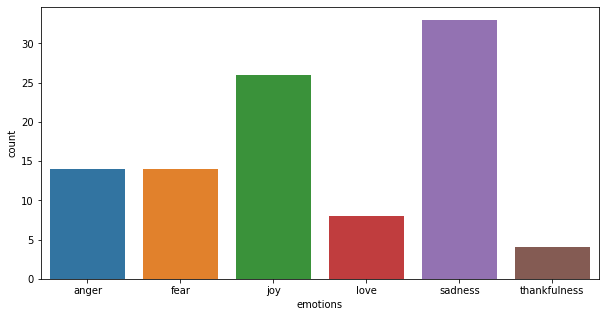

In [69]:
display_bar_chart(og_df, emotion_col="emotions", emotion_count_col="count")

## Predicted Dataset

In [70]:
df = pd.read_csv("C://Users/ksriniv2/Downloads/AdventuresOfTomSawyer_DataSetCsv results.csv")
df.head()

,text,joy,sadness,anger,love,thankfulness,fear
0,"Tom did play hookey, and he had a very good time.",0.573,0.463,0.914,0.266,0.630,0.622
1,Diligence and attention soon gave him the knac...,0.838,0.510,0.742,0.768,0.238,0.153
2,He felt much as an astronomer feels who has di...,0.163,0.405,0.634,0.861,0.542,0.123
3,"�Oh, you think you�re mighty smart, don�t you?...",0.120,0.595,0.270,0.667,0.107,0.780
4,You�re a coward and a pup. I�ll tell my big br...,0.236,0.483,0.947,0.725,0.412,0.076


In [72]:
pred_df = get_max_emotion_score_df(file="C://Users/ksriniv2/Downloads/AdventuresOfTomSawyer_DataSetCsv results.csv",
                             emotion_col="emotions",
                             emotion_count_col="count")
pred_df.head()

,text,joy,sadness,anger,love,thankfulness,fear,emotions,count
0,"Tom did play hookey, and he had a very good time.",0.573,0.463,0.914,0.266,0.630,0.622,anger,30
1,Diligence and attention soon gave him the knac...,0.838,0.510,0.742,0.768,0.238,0.153,joy,9
2,He felt much as an astronomer feels who has di...,0.163,0.405,0.634,0.861,0.542,0.123,love,20
3,"�Oh, you think you�re mighty smart, don�t you?...",0.120,0.595,0.270,0.667,0.107,0.780,fear,2
4,You�re a coward and a pup. I�ll tell my big br...,0.236,0.483,0.947,0.725,0.412,0.076,anger,30


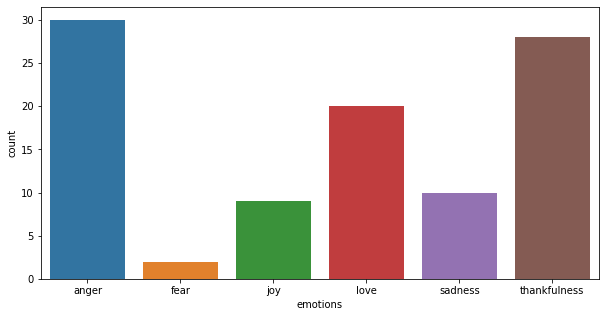

In [73]:
display_bar_chart(pred_df, emotion_col="emotions", emotion_count_col="count")

### Categorize Emotions column (Original dataset)

In [74]:
og_df.dtypes

text        object
emotions    object
count        int64
dtype: object

In [75]:
og_df["emotions"] = og_df["emotions"].astype('category')

In [76]:
category_dict = dict(sorted(zip(og_df.emotions.cat.codes, og_df.emotions)))

In [77]:
for k, v in category_dict.items(): print(k, v)

0 anger
1 fear
2 joy
3 love
4 sadness
5 thankfulness


In [78]:
og_df.dtypes

text          object
emotions    category
count          int64
dtype: object

In [79]:
og_df["emotions_cat"] = og_df["emotions"].cat.codes
og_df.head()

,text,emotions,count,emotions_cat
0,"His aunt Polly stood surprised a moment, and t...",joy,26,2
1,"Tom did play hookey, and he had a very good time.",joy,26,2
2,Diligence and attention soon gave him the knac...,thankfulness,4,5
3,He felt much as an astronomer feels who has di...,joy,26,2
4,"“Oh, you think you’re mighty smart, don’t you?...",anger,14,0


### Categorize Emotions column (Predicted dataset)

In [80]:
pred_df.dtypes

text             object
joy             float64
sadness         float64
anger           float64
love            float64
thankfulness    float64
fear            float64
emotions         object
count             int64
dtype: object

In [81]:
pred_df["emotions"] = pred_df["emotions"].astype('category')

In [82]:
category_dict = dict(sorted(zip(pred_df.emotions.cat.codes, pred_df.emotions)))

In [83]:
for k, v in category_dict.items(): print(k, v)

0 anger
1 fear
2 joy
3 love
4 sadness
5 thankfulness


In [84]:
pred_df.dtypes

text              object
joy              float64
sadness          float64
anger            float64
love             float64
thankfulness     float64
fear             float64
emotions        category
count              int64
dtype: object

In [85]:
pred_df["emotions_cat"] = pred_df["emotions"].cat.codes
pred_df.head()

,text,joy,sadness,anger,love,thankfulness,fear,emotions,count,emotions_cat
0,"Tom did play hookey, and he had a very good time.",0.573,0.463,0.914,0.266,0.630,0.622,anger,30,0
1,Diligence and attention soon gave him the knac...,0.838,0.510,0.742,0.768,0.238,0.153,joy,9,2
2,He felt much as an astronomer feels who has di...,0.163,0.405,0.634,0.861,0.542,0.123,love,20,3
3,"�Oh, you think you�re mighty smart, don�t you?...",0.120,0.595,0.270,0.667,0.107,0.780,fear,2,1
4,You�re a coward and a pup. I�ll tell my big br...,0.236,0.483,0.947,0.725,0.412,0.076,anger,30,0


In [86]:
og_df.head()

,text,emotions,count,emotions_cat
0,"His aunt Polly stood surprised a moment, and t...",joy,26,2
1,"Tom did play hookey, and he had a very good time.",joy,26,2
2,Diligence and attention soon gave him the knac...,thankfulness,4,5
3,He felt much as an astronomer feels who has di...,joy,26,2
4,"“Oh, you think you’re mighty smart, don’t you?...",anger,14,0


In [87]:
pred_df.head()

,text,joy,sadness,anger,love,thankfulness,fear,emotions,count,emotions_cat
0,"Tom did play hookey, and he had a very good time.",0.573,0.463,0.914,0.266,0.630,0.622,anger,30,0
1,Diligence and attention soon gave him the knac...,0.838,0.510,0.742,0.768,0.238,0.153,joy,9,2
2,He felt much as an astronomer feels who has di...,0.163,0.405,0.634,0.861,0.542,0.123,love,20,3
3,"�Oh, you think you�re mighty smart, don�t you?...",0.120,0.595,0.270,0.667,0.107,0.780,fear,2,1
4,You�re a coward and a pup. I�ll tell my big br...,0.236,0.483,0.947,0.725,0.412,0.076,anger,30,0


## Confusion Matrix

In [88]:
confusion = confusion_matrix(og_df["emotions_cat"], pred_df["emotions_cat"])

In [89]:
confusion

array([[ 5,  0,  1,  3,  1,  4],
       [ 5,  0,  0,  3,  3,  3],
       [ 9,  2,  3,  5,  2,  5],
       [ 4,  0,  0,  0,  1,  3],
       [ 7,  0,  5,  8,  2, 11],
       [ 0,  0,  0,  1,  1,  2]], dtype=int64)

In [90]:
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    """
    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix
    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']
    title:        the text to display at the top of the matrix
    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues
    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix by sklearn.metrics.confusion_matrix 
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10, 7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(
        accuracy, misclass))
    plt.show()

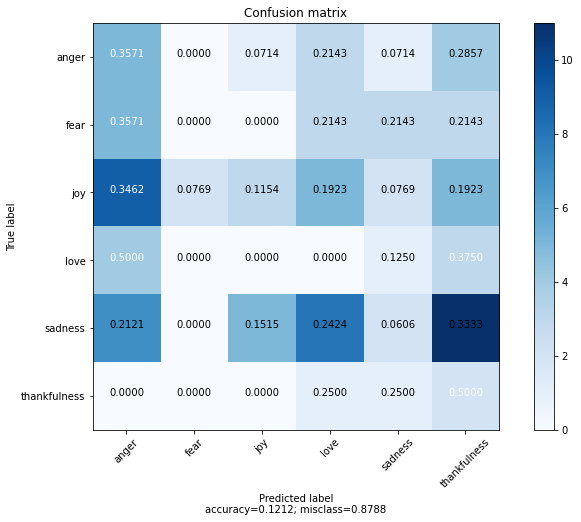

In [91]:
target_names = []
for k, v in category_dict.items(): target_names.append(v)
plot_confusion_matrix(cm=confusion, target_names=target_names, title='Confusion matrix')

### Precision-Recall Report
<div>
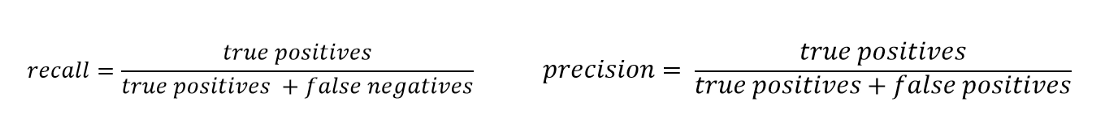
</div>

In [92]:
classes = []
for k, v in category_dict.items(): classes.append(v)
classes

['anger', 'fear', 'joy', 'love', 'sadness', 'thankfulness']

In [93]:
print(classification_report(og_df["emotions_cat"], pred_df["emotions_cat"], target_names=classes))

              precision    recall  f1-score   support

       anger       0.17      0.36      0.23        14
        fear       0.00      0.00      0.00        14
         joy       0.33      0.12      0.17        26
        love       0.00      0.00      0.00         8
     sadness       0.20      0.06      0.09        33
thankfulness       0.07      0.50      0.12         4

    accuracy                           0.12        99
   macro avg       0.13      0.17      0.10        99
weighted avg       0.18      0.12      0.11        99

